# Visualizing Training Metrics for Four Models
This notebook visualizes the training loss, training accuracy, and test accuracy for four models using Seaborn. Each metric is plotted as a separate graph with overlayed lines for the models.

In [49]:
import yaml
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import ast

In [50]:
df = pd.read_csv('grid_search_2.csv')

# Convert to DataFrame
df

,learning_rate,batch_size,dropout_rate,train_losses,train_accuracies,test_accuracies,final_acc,tpr,fpr,recall
0,0.0001,16,0.1,"[0.41000926397680265, 0.287202753914081, 0.206...","[0.8154471544715447, 0.8788617886178862, 0.915...","[0.8668831168831169, 0.8863636363636364, 0.918...",0.974026,[0.98684211],[0.0625],[0.98684211]
1,0.0001,16,0.2,"[0.4217098494855369, 0.2958694007338547, 0.213...","[0.802439024390244, 0.8682926829268293, 0.9195...","[0.8344155844155844, 0.8766233766233766, 0.918...",0.964286,[0.98684211],[0.1],[0.98684211]
2,0.0001,16,0.3,"[0.417391154339643, 0.27635730572832307, 0.205...","[0.7943089430894309, 0.8821138211382114, 0.921...","[0.8668831168831169, 0.8961038961038961, 0.928...",0.970779,[1.],[0.1125],[1.]
3,0.0001,16,0.4,"[0.4587392397043182, 0.3113618874937538, 0.247...","[0.7894308943089431, 0.8617886178861789, 0.910...","[0.8409090909090909, 0.8376623376623377, 0.892...",0.964286,[0.99561404],[0.125],[0.99561404]
4,0.0001,32,0.1,"[0.4534130687393793, 0.3274711866204332, 0.237...","[0.7886178861788617, 0.8569105691056911, 0.909...","[0.7987012987012987, 0.8701298701298701, 0.899...",0.967532,[0.99122807],[0.1],[0.99122807]
...,...,...,...,...,...,...,...,...,...,...
59,0.0050,64,0.4,"[1.1070554612128716, 0.4195031501413361, 0.370...","[0.7048780487804878, 0.7764227642276422, 0.817...","[0.6883116883116883, 0.7987012987012987, 0.827...",0.938312,[0.95614035],[0.1125],[0.95614035]
60,0.0050,128,0.1,"[1.356908753877733, 0.42931915657307074, 0.396...","[0.7032520325203252, 0.7642276422764228, 0.777...","[0.7402597402597403, 0.7532467532467533, 0.766...",0.941558,[0.98684211],[0.1875],[0.98684211]
61,0.0050,128,0.2,"[1.1926740753456828, 0.5187742103890675, 0.376...","[0.7178861788617886, 0.7878048780487805, 0.833...","[0.7402597402597403, 0.7824675324675324, 0.818...",0.935065,[0.98684211],[0.2125],[0.98684211]
62,0.0050,128,0.3,"[1.4782733199073048, 0.572229074850315, 0.4513...","[0.6455284552845528, 0.7634146341463415, 0.766...","[0.7402597402597403, 0.7305194805194806, 0.740...",0.931818,[0.96052632],[0.15],[0.96052632]


In [51]:
df['test_accuracies'] = df['test_accuracies'].apply(ast.literal_eval)


C:\Users\willi\AppData\Local\Temp\ipykernel_37584\1155658257.py:27: UserWarning:

Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.



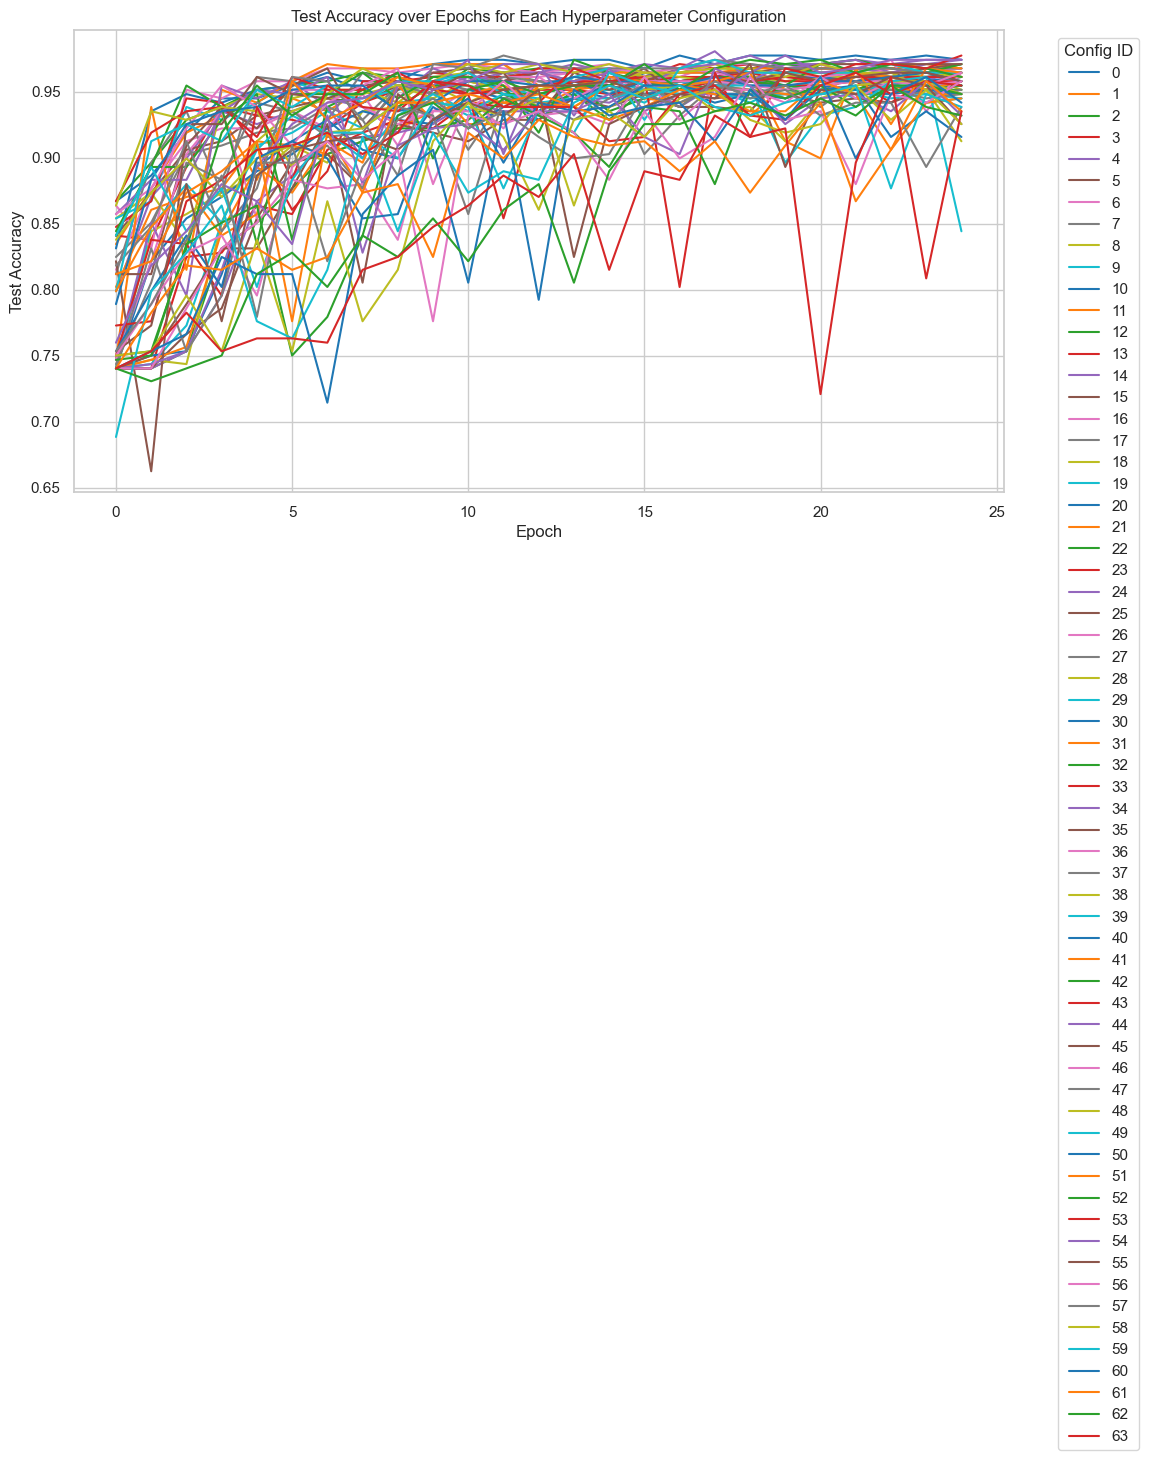

In [52]:

records = []

for idx, row in df.iterrows():
    test_accuracies = row['test_accuracies']
    for epoch in range(len(test_accuracies)):
        records.append({
            'epoch': epoch,
            'test_accuracy': test_accuracies[epoch],
            'learning_rate': row['learning_rate'],
            'batch_size': row['batch_size'],
            'dropout_rate': row['dropout_rate'],
            'config_id': idx  # use row index as config identifier
        })


# Create a long-form DataFrame
long_df = pd.DataFrame(records)
long_df

# Plot
plt.figure(figsize=(12, 6))
sns.lineplot(data=long_df, x='epoch', y='test_accuracy', hue='config_id', palette='tab10')
plt.title('Test Accuracy over Epochs for Each Hyperparameter Configuration')
plt.xlabel('Epoch')
plt.ylabel('Test Accuracy')
plt.legend(title='Config ID', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

In [54]:
# If needed: convert string to list
# df['test_accuracies'] = df['test_accuracies'].apply(ast.literal_eval)

# Create a new DataFrame with the last test accuracy
summary_df = df.sort_values(by='final_acc', ascending=False).head(10)
# Display the new DataFrame
summary_df

,learning_rate,batch_size,dropout_rate,train_losses,train_accuracies,test_accuracies,final_acc,tpr,fpr,recall
43,0.0010,64,0.4,"[0.5552952258082909, 0.36309970682714043, 0.30...","[0.751219512195122, 0.8333333333333334, 0.8634...","[0.75, 0.8376623376623377, 0.8344155844155844,...",0.977273,[0.99561404],[0.075],[0.99561404]
0,0.0001,16,0.1,"[0.41000926397680265, 0.287202753914081, 0.206...","[0.8154471544715447, 0.8788617886178862, 0.915...","[0.8668831168831169, 0.8863636363636364, 0.918...",0.974026,[0.98684211],[0.0625],[0.98684211]
34,0.0010,16,0.3,"[0.43377553859377294, 0.27757388615026707, 0.1...","[0.8056910569105691, 0.875609756097561, 0.9325...","[0.8571428571428571, 0.8831168831168831, 0.883...",0.974026,[0.99122807],[0.075],[0.99122807]
24,0.0005,64,0.1,"[0.4977942271445825, 0.311936123487426, 0.2355...","[0.7544715447154472, 0.8658536585365854, 0.904...","[0.7467532467532467, 0.8506493506493507, 0.795...",0.974026,[0.99122807],[0.075],[0.99122807]
44,0.0010,128,0.1,"[0.6204460317526407, 0.3873574848582105, 0.330...","[0.7357723577235772, 0.8170731707317073, 0.858...","[0.7402597402597403, 0.7435064935064936, 0.753...",0.974026,[0.98684211],[0.0625],[0.98684211]
32,0.0010,16,0.1,"[0.4303280511522681, 0.26543233922826565, 0.20...","[0.8065040650406504, 0.8943089430894309, 0.922...","[0.8441558441558441, 0.8928571428571429, 0.954...",0.970779,[0.99122807],[0.0875],[0.99122807]
25,0.0005,64,0.2,"[0.46799633973013094, 0.31538684392363076, 0.2...","[0.7796747967479675, 0.8601626016260162, 0.895...","[0.8116883116883117, 0.8116883116883117, 0.909...",0.970779,[0.99561404],[0.1],[0.99561404]
2,0.0001,16,0.3,"[0.417391154339643, 0.27635730572832307, 0.205...","[0.7943089430894309, 0.8821138211382114, 0.921...","[0.8668831168831169, 0.8961038961038961, 0.928...",0.970779,[1.],[0.1125],[1.]
35,0.0010,16,0.4,"[0.46427550625994923, 0.2917644130989788, 0.22...","[0.7910569105691057, 0.8747967479674796, 0.903...","[0.8214285714285714, 0.6623376623376623, 0.925...",0.970779,[0.99122807],[0.0875],[0.99122807]
17,0.0005,16,0.2,"[0.40931398064140384, 0.2659277797229891, 0.17...","[0.7991869918699187, 0.8772357723577235, 0.924...","[0.8116883116883117, 0.8961038961038961, 0.935...",0.967532,[0.98684211],[0.0875],[0.98684211]
